### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Выбираем данные

In [30]:
auto_data = pd.read_csv("bmw.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [4]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


Из информации, полученной с помощью функции info() можно сделать вывод, что значений null в датасете нет

 Проверим столбцы, в которых наиболее вероятно могут быть выбросы:
1. Проверим машины с атрибутом engineSize <= 0, так как объем двигателя не может быть нулевым, тем более меньше нуля

In [13]:
auto_data[auto_data.engineSize <= 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
621,i3,2017,19998,Automatic,41949,Hybrid,140,470.8,0.0
778,i3,2017,19998,Automatic,41146,Hybrid,0,470.8,0.0
780,i3,2017,21898,Automatic,10839,Hybrid,0,470.8,0.0
1866,i3,2017,19980,Automatic,26965,Hybrid,140,470.8,0.0
2352,i3,2016,19490,Automatic,8421,Hybrid,0,470.8,0.0
3277,i3,2016,16482,Automatic,43695,Hybrid,0,470.8,0.0
3628,i3,2015,14285,Automatic,65800,Hybrid,0,470.8,0.0
3913,i3,2017,18500,Automatic,36429,Hybrid,0,470.8,0.0
4100,i3,2017,19495,Automatic,17338,Hybrid,135,470.8,0.0
4109,i3,2015,17481,Automatic,9886,Hybrid,0,470.8,0.0


Так как таких строк не очень много, уберем их из датасета

In [31]:
auto_data = auto_data[auto_data.engineSize > 0]
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


2. Проверим машины с атрибутом mpg <= 0, так как расход топлива не может быть нулевым, тем более меньше нуля (таких значений не обнаружено)

In [15]:
auto_data[auto_data.mpg <= 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


3. Проверим машины с атрибутом tax < 0, так как сумма налога не может быть меньше нуля (таких значений не обнаружено)

In [17]:
auto_data[auto_data.tax < 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


4. Проверим год выпуска машины, чтобы у нас не было машин из будущего (таких значений не обнаружено)

In [18]:
auto_data[auto_data.year > 2021]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


5. Проверим, что стоимость авто и его пробег не отприцательны  (таких значений не обнаружено)

In [24]:
auto_data[auto_data.price <= 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [23]:
auto_data[auto_data.mileage <= 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [35]:
# Преобразуем номинальные величины в значения от 0 до n-1
object_cols = auto_data.columns[auto_data.dtypes == 'object']
le = LabelEncoder()
for col in object_cols:
    auto_data1[col] = le.fit_transform(auto_data[col])
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2014,11200,0,67068,0,125,57.6,2.0
1,5,2018,27000,0,14827,4,145,42.8,2.0
2,4,2016,16000,0,62794,0,160,51.4,3.0
3,0,2017,12750,0,26676,0,145,72.4,1.5
4,6,2014,14500,0,39554,0,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,15,2016,19000,0,40818,0,150,54.3,2.0
10777,4,2016,14600,0,42947,0,125,60.1,2.0
10778,2,2017,13100,1,25468,4,200,42.8,2.0
10779,0,2014,9930,0,45000,0,30,64.2,2.0


In [40]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10734 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10734 non-null  int32  
 1   year          10734 non-null  int64  
 2   price         10734 non-null  int64  
 3   transmission  10734 non-null  int32  
 4   mileage       10734 non-null  int64  
 5   fuelType      10734 non-null  int32  
 6   tax           10734 non-null  int64  
 7   mpg           10734 non-null  float64
 8   engineSize    10734 non-null  float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 712.8 KB


In [36]:
# Разделяем данные на признаки и ответы
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']

In [37]:
# Разделяем данные на тренировочные и тестовые
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [38]:
# Стандартизируем данные
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled

array([[-0.69804859, -1.30610154, -0.11761256, ..., -0.10365064,
         0.19143509, -0.32657391],
       [-0.69804859,  1.24796948,  1.03443851, ...,  0.22853546,
        -0.22226545, -0.32657391],
       [ 1.47924863,  0.82229098,  1.03443851, ...,  0.22853546,
        -0.79171208, -0.32657391],
       ...,
       [-0.865533  ,  1.24796948,  1.03443851, ...,  0.22853546,
         0.13303031, -1.26619927],
       [-0.53056419, -0.02906603,  1.03443851, ...,  0.22853546,
        -0.30500556, -0.32657391],
       [ 1.31176423, -0.02906603,  1.03443851, ...,  0.47767504,
        -0.4948211 , -0.32657391]])

#### Попытаться обучить регрессии c лучшим качеством

In [41]:
#Линейная регрессия
simple_LR = LinearRegression()
simple_LR.fit(X_train_scaled, Y_train)
# Строим прогноз
simple_LR_predictions = simple_LR.predict(X_test_scaled)
simple_LR_predictions

array([23583.50842033, 31937.52789421, 16761.72135284, ...,
       19611.54559605, 23753.27323295, 25822.9321198 ])

Text(0, 0.5, 'Target')

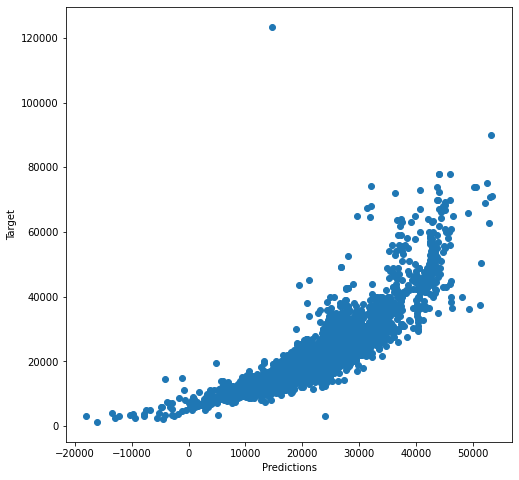

In [42]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [43]:
# Считаем среднеквадратичную ошибку
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')

RMSE = 6019.106


In [46]:
#Lasso
model = Lasso()
model.fit(X_train_scaled, Y_train)
#predictions = model.predict(X_test_scaled)
#predictions

Lasso()

In [47]:
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 6019.256


In [55]:
#LassoCV
model = LassoCV(random_state=10)
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 6020.186


In [56]:
#Ridge
model = Ridge()
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 6019.184


In [57]:
#RidgeCV
model = RidgeCV()
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 6019.891


In [58]:
#Лес
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10, n_estimators = 100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 3125.489


Text(0, 0.5, 'Target')

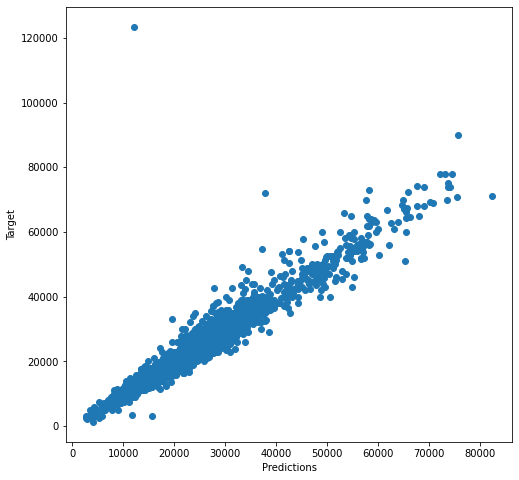

In [54]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')